In [1]:
# imports
import numpy as np

from commstools.channel import add_gaussian_noise
from commstools.plotting import filter_response
from commstools.baseband import qam


12:21:25 - CommsTools - INFO - CuPy is available and functional, defaulting Signals to GPU.


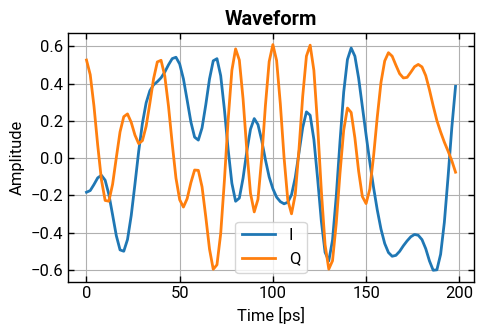

In [2]:
symbol_rate = 100e9
sampling_rate = 500e9
sps = int(sampling_rate / symbol_rate)

sig_4qam = qam(
    order=16,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    seed=42,
)
sig_4qam.plot_symbols(num_symbols=20, show=True)


In [15]:
sig_4qam.to("gpu")
sig_4qam.backend


'GPU'

In [16]:
jsamples = sig_4qam.export_samples_to_jax()


In [19]:
jsamples.device


CudaDevice(id=0)

In [12]:
import jax

cpu_device = jax.devices("cpu")[0]
jsamples = jax.device_put(jsamples, cpu_device)
jsamples.device


CpuDevice(id=0)

In [ ]:
jsamples = jsamples.at[0].set(10)


In [20]:
sig_4qam.update_samples_from_jax(jsamples)


Signal(samples=array([10.        +0.j        , -0.17370631+0.44857076j,
       -0.1414804 +0.28076982j, ...,  0.3758503 -0.40883106j,
        0.21838324-0.24721251j,  0.0644929 -0.07833857j],
      shape=(500000,), dtype=complex64), sampling_rate=500000000000.0, symbol_rate=100000000000.0, modulation_scheme='16-QAM', pulse_shape='rrc', pulse_params={'filter_span': 10, 'rrc_rolloff': 0.35, 'rc_rolloff': 0.35, 'smoothrect_bt': 1.0, 'gaussian_bt': 0.3}, spectral_domain='BASEBAND', physical_domain='DIG', center_frequency=0, digital_frequency_offset=0)

In [21]:
sig_4qam.print_info()


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation Scheme,16-QAM
3,Sampling Rate,500.00 GHz
4,Symbol Rate,100.00 GBaud
5,Samples Per Symbol,5.00
6,Pulse Shape,RRC
7,Duration,1.00 µs
8,Center Frequency,0.00 Hz
9,Digital Freq. Offset,0.00 Hz


(<Figure size 500x350 with 1 Axes>,
 <Axes: title={'center': 'Waveform'}, xlabel='Time [ps]', ylabel='Amplitude'>)

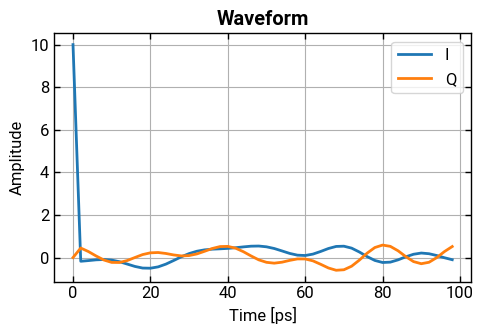

In [ ]:
sig_4qam.plot_symbols(num_symbols=10)
